# Lab | Handling Data Imbalance in Classification Models

     For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using files_for_lab/Customer-Churn.csv file.
Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.
Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

    1. Import the required libraries and modules that you would need.
    2. Read that data into Python and call the dataframe churnData.
    3. Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. 
    4. Convert this column into numeric type using pd.to_numeric function.
    5. Check for null values in the dataframe. Replace the null values.
    6. Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
        Scale the features either by using normalizer or a standard scaler.
        Split the data into a training set and a test set.
        Fit a logistic regression model on the training data.
        Check the accuracy on the test data.

Note: So far we have not balanced the data.

Managing imbalance in the dataset

    Check for the imbalance.
    Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
    Each time fit the model and see how the accuracy of the model is.


In [3]:
#general libraries
import pandas as pd
import numpy as np
import getpass

#SQL
import pymysql
from sqlalchemy import create_engine
#plot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib

#from scipy.stats import normaltest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import Normalizer, StandardScaler, PowerTransformer

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, cohen_kappa_score, accuracy_score, classification_report

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks


Using matplotlib backend: Qt5Agg


C:\Users\Borja\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
churnData = pd.read_csv('files_for_lab/Customer-Churn.csv')

churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [5]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')
# number of nulls
display('Number of nulls: ',churnData['TotalCharges'].isna().sum())

display('Total number of rows: ',len(churnData))

'Number of nulls: '

11

'Total number of rows: '

7043

In [6]:
# Since 11 is not a significant value, I decided to filter them out.

churnData = churnData[churnData['TotalCharges'].notna()]

display('Total number of rows after dropping nulls: ',len(churnData))

'Total number of rows after dropping nulls: '

7032

In [7]:
# number of nulls
display('Number of nulls: ',churnData.isna().sum())

'Number of nulls: '

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### No null values anymore.

6. Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
        Scale the features either by using normalizer or a standard scaler.
        Split the data into a training set and a test set.
        Fit a logistic regression model on the training data.
        Check the accuracy on the test data.

In [8]:
independent_features = churnData[['tenure','SeniorCitizen', 'MonthlyCharges','TotalCharges']]

independent_features

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


In [9]:
display(independent_features.max())
display(independent_features.min())

tenure              72.00
SeniorCitizen        1.00
MonthlyCharges     118.75
TotalCharges      8684.80
dtype: float64

tenure             1.00
SeniorCitizen      0.00
MonthlyCharges    18.25
TotalCharges      18.80
dtype: float64

In [10]:
# Normalizer acts row-wise while StandardScaler column-wise. 
# In our case, I think it makes sense to use the normalizer since the ranges within 
# the columns are so different.

list(independent_features.columns)

['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']

In [11]:
transformer = Normalizer().fit(independent_features)  # fit does nothing.
ind_feat_trans = transformer.transform(independent_features)
ind_feat_trans_df = pd.DataFrame(ind_feat_trans)
ind_feat_trans_df.columns = list(independent_features.columns)
ind_feat_trans_df

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,0.023682,0.000000,0.706908,0.706908
1,0.017983,0.000000,0.030122,0.999384
2,0.016552,0.000000,0.445662,0.895048
3,0.024433,0.000000,0.022967,0.999438
4,0.011952,0.000000,0.422512,0.906279
...,...,...,...,...
7027,0.012045,0.000000,0.042561,0.999021
7028,0.009777,0.000000,0.014014,0.999854
7029,0.031620,0.000000,0.085085,0.995872
7030,0.012677,0.003169,0.235798,0.971714


In [39]:
display("Max: ",ind_feat_trans_df.max())
display("Min: ", ind_feat_trans_df.min())

# As we can see, the ranges our now more similar.

'Max: '

tenure            0.070634
SeniorCitizen     0.036307
MonthlyCharges    0.707090
TotalCharges      0.999874
dtype: float64

'Min: '

tenure            0.006902
SeniorCitizen     0.000000
MonthlyCharges    0.012589
TotalCharges      0.706174
dtype: float64

In [41]:
## Helper functions

def calculate_display_results(model,predic,X_test,y_test):
    # accuracy_score
    # fitted X_test data vs. y_test data (actual answer)
    accuracy =   round(accuracy_score(predic,y_test),2)
    display(f'Accuracy score: {accuracy:.2f}')
    # Kappa score
    kappa =  round(cohen_kappa_score(y_test,predic),2)
    display(f'Kappa:{kappa:.2f}')
    recall = round(recall_score(y_test, predic, average='binary'),2)
    display(f'Recall:{recall:.2f}')
    # classification report
    print('Classification report')
    classif_report = classification_report(predic,y_test)
    print(classif_report) 
    # compare predictions to actual answers
    display('Confusion matrix')
    conf_mat = confusion_matrix(predic,y_test).T
    # visualize confusion matrix 
    ax = plot_confusion_matrix(model,X_test, y_test)
    plt.show()  
    
    return accuracy, kappa, recall, conf_mat,classif_report

def append_to_results(accuracy, kappa, recall, conf_mat,classif_report):
    infos_from_model =[]
    infos_from_model.append(accuracy)
    infos_from_model.append(kappa)
    infos_from_model.append(recall)
    infos_from_model.append(conf_mat)
    infos_from_model.append(classif_report)
    return infos_from_model

results={}

In [40]:
# X-y split
X = ind_feat_trans_df.copy().reset_index()
y = churnData[['Churn']].reset_index()
display(y.head())
y = y['Churn'].map({'Yes':1, 'No':0})
display(y.value_counts())


,index,Churn
0,0,No
1,1,No
2,2,Yes
3,3,No
4,4,Yes


0    5163
1    1869
Name: Churn, dtype: int64

In [14]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
log_reg = LogisticRegression(random_state=42,  solver='lbfgs', max_iter=500, multi_class='ovr').fit(X_train, y_train)
predic = log_reg.predict(X_test)

'Accuracy score: 0.76'

'Kappa:0.22'

'Recall:0.23'

Classification report
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      1264
           1       0.23      0.61      0.34       143

    accuracy                           0.76      1407
   macro avg       0.59      0.69      0.59      1407
weighted avg       0.87      0.76      0.80      1407



'Confusion matrix'

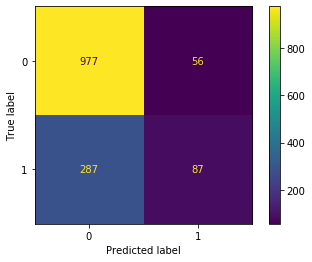

In [17]:
# Model results with class imbalance
accuracy, kappa, recall, conf_mat,classif_report = calculate_display_results(log_reg,predic,X_test,y_test)

# Add results to result dictionary
inf_from_model = append_to_results(accuracy, kappa, recall, conf_mat,classif_report)

results['log_reg']= inf_from_model


In [18]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

# Managing imbalance in the dataset

    Check for the imbalance.
    Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
    Each time fit the model and see how the accuracy of the model is.

## Upsampling copies of existing samples

In [42]:
data = X.copy()
data['Churn']=y

category_0 = data[data['Churn'] == 0]
category_1 = data[data['Churn'] == 1]

# Upsampling 
# As we are going to repeat observations, the random samples can be picked more then once,
# threfore we need to use the keyword: replace=True
category_1 = category_1.sample(len(category_0), replace=True) 
#  to ensure we can repeat the minority class so that 
#  it can become the same amount of samples as the majority class
print(category_1.shape)

data = pd.concat([category_0, category_1], axis=0)
#shuffling the data
data = data.sample(frac=1)
print(data['Churn'].value_counts())

y_us = data['Churn']
X_us = data.drop(['Churn','index'],axis = 1)



(5163, 6)
1    5163
0    5163
Name: Churn, dtype: int64


In [43]:

transformer = Normalizer().fit(X_us)
X_us_trans = transformer.transform(X_us)
X_us_trans_df = pd.DataFrame(X_us_trans)
X_us_trans_df.columns = list(X_us.columns)
X_us_trans_df


,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,0.011781,0.000000,0.067703,0.997636
1,0.021609,0.000000,0.176292,0.984101
2,0.049147,0.000000,0.336656,0.940344
3,0.051145,0.000000,0.080979,0.995403
4,0.048274,0.000000,0.240890,0.969351
...,...,...,...,...
10321,0.012098,0.000000,0.015935,0.999800
10322,0.009813,0.004906,0.466608,0.884396
10323,0.011762,0.000000,0.014526,0.999825
10324,0.014667,0.000000,0.046334,0.998818


In [49]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_us_trans_df, y_us, test_size=0.2, random_state=42)

In [50]:
log_reg_us = LogisticRegression(random_state=42,  solver='lbfgs', max_iter=500, multi_class='ovr').fit(X_train, y_train)
predic_us = log_reg_us.predict(X_test)

'Accuracy score: 0.67'

'Kappa:0.34'

'Recall:0.49'

Classification report
              precision    recall  f1-score   support

           0       0.85      0.63      0.72      1409
           1       0.49      0.76      0.59       657

    accuracy                           0.67      2066
   macro avg       0.67      0.69      0.66      2066
weighted avg       0.73      0.67      0.68      2066



'Confusion matrix'

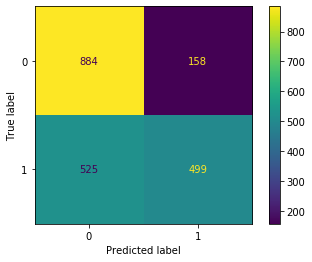

In [51]:
# Model results with class imbalance
accuracy, kappa, recall, conf_mat,classif_report = calculate_display_results(log_reg_us,predic_us,X_test,y_test)

# Add results to result dictionary
inf_from_model = append_to_results(accuracy, kappa, recall, conf_mat,classif_report)

results['log_reg_us']= inf_from_model

## Downsampling

In [24]:
data = X.copy()
data['Churn']=y

category_0 = data[data['Churn'] == 0]
category_1 = data[data['Churn'] == 1]

# We pick a random sample of rows from of observations belonging to "category_0"
# in the same amount of observations belonging to "category_1"
category_0 = category_0.sample(len(category_1)) #random sample of category 0 - same length as category_1
print(category_0.shape)
print(category_1.shape)

data = pd.concat([category_0, category_1], axis=0)
#shuffling the data
data = data.sample(frac=1) # shuffling the data so that cat0 and cat1 samples are mixed
data['Churn'].value_counts()

y_ds = data['Churn']
X_ds = data.drop(['Churn','index'],axis = 1)



(1869, 6)
(1869, 6)


In [25]:

transformer = Normalizer().fit(X_ds)
X_ds_trans = transformer.transform(X_ds)
X_ds_trans_df = pd.DataFrame(X_ds_trans)
X_ds_trans_df.columns = list(X_ds.columns)
X_ds_trans_df


,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,0.020056,0.00000,0.706965,0.706965
1,0.007936,0.00000,0.707085,0.707085
2,0.009388,0.00000,0.014490,0.999851
3,0.010195,0.00000,0.014166,0.999848
4,0.009384,0.00000,0.707076,0.707076
...,...,...,...,...
3733,0.017975,0.00000,0.023556,0.999561
3734,0.041787,0.00000,0.020810,0.998910
3735,0.016566,0.00000,0.020829,0.999646
3736,0.034984,0.00000,0.706674,0.706674


In [53]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_ds_trans_df, y_ds, test_size=0.2, random_state=42)

In [54]:
log_reg_ds = LogisticRegression(random_state=42,  solver='lbfgs', max_iter=500, multi_class='ovr').fit(X_train, y_train)
predic_ds = log_reg_ds.predict(X_test)

'Accuracy score: 0.67'

'Kappa:0.34'

'Recall:0.50'

Classification report
              precision    recall  f1-score   support

           0       0.83      0.65      0.73       503
           1       0.50      0.73      0.59       245

    accuracy                           0.67       748
   macro avg       0.67      0.69      0.66       748
weighted avg       0.72      0.67      0.68       748



'Confusion matrix'

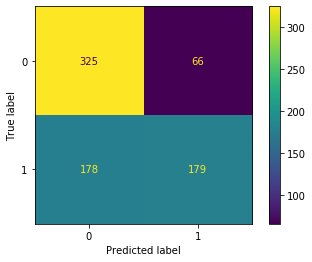

In [55]:
# Model results with class imbalance
accuracy, kappa, recall, conf_mat,classif_report = calculate_display_results(log_reg_ds,predic_ds,X_test,y_test)

# Add results to result dictionary
inf_from_model = append_to_results(accuracy, kappa, recall, conf_mat,classif_report)

results['log_reg_ds']= inf_from_model



# Lab | Cross Validation

For this lab, we will build a model on customer churn binary classification problem. You will be using files_for_lab/Customer-Churn.csv file.
Instructions

    Apply SMOTE for upsampling the data
        Use logistic regression to fit the model and compute the accuracy of the model.
        Use decision tree classifier to fit the model and compute the accuracy of the model.
        Compare the accuracies of the two models.

    Apply TomekLinks for downsampling
        It is important to remember that it does not make the two classes equal but only removes the points from the majority class that are close to other points in minority class.
        Use logistic regression to fit the model and compute the accuracy of the model.
        Use decision tree classifier to fit the model and compute the accuracy of the model.
        Compare the accuracies of the two models.
        You can also apply this algorithm one more time and check the how the imbalance in the two classes changed from the last time.


## SMOTE - upsampling random samples

In [69]:
smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [70]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [71]:
log_reg_sm = LogisticRegression(random_state=42,  solver='lbfgs', max_iter=500, multi_class='ovr').fit(X_train, y_train)
predic_sm = log_reg_sm.predict(X_test)

'Accuracy score: 0.67'

'Kappa:0.34'

'Recall:0.48'

Classification report
              precision    recall  f1-score   support

           0       0.87      0.63      0.73      1438
           1       0.48      0.78      0.59       628

    accuracy                           0.67      2066
   macro avg       0.67      0.70      0.66      2066
weighted avg       0.75      0.67      0.69      2066



'Confusion matrix'

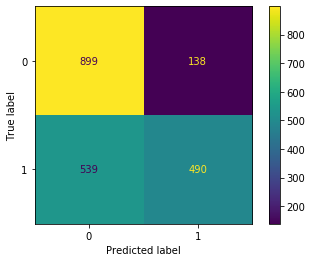

In [72]:
## Model results with class imbalance
accuracy, kappa, recall, conf_mat,classif_report = calculate_display_results(log_reg_sm,predic_sm,X_test,y_test)

# Add results to result dictionary
inf_from_model = append_to_results(accuracy, kappa, recall, conf_mat,classif_report)

results['log_reg_sm']= inf_from_model



# Tomek Links

In [65]:
tomekl = TomekLinks()
X_tl, y_tl = tomekl.fit_sample(X, y)

y_tl.value_counts()


0    4511
1    1869
Name: Churn, dtype: int64

In [66]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=42)

In [67]:
log_reg_tl = LogisticRegression(random_state=42,  solver='lbfgs', max_iter=500, multi_class='ovr').fit(X_train, y_train)
predic_tl = log_reg_tl.predict(X_test)

'Accuracy score: 0.74'

'Kappa:0.22'

'Recall:0.24'

Classification report
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1131
           1       0.24      0.61      0.35       145

    accuracy                           0.74      1276
   macro avg       0.59      0.69      0.59      1276
weighted avg       0.86      0.74      0.78      1276



'Confusion matrix'

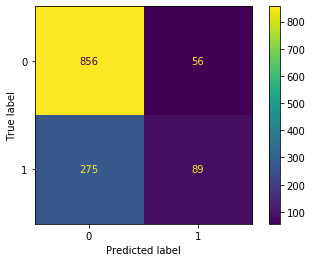

In [68]:
## Model results with class imbalance
accuracy, kappa, recall, conf_mat,classif_report = calculate_display_results(log_reg_tl,predic_tl,X_test,y_test)

# Add results to result dictionary
inf_from_model = append_to_results(accuracy, kappa, recall, conf_mat,classif_report)

results['log_reg_tl']= inf_from_model



In [74]:
#Result comparison

results_df = pd.DataFrame()
results_df['parameters']=['Accuracy','Kappa','Recall']
for key, value in results.items() :
    results_df[key]=[value[0],value[1],value[2]]
results_df.set_index('parameters',inplace=True)
results_df=results_df.T
results_df.sort_values(by =['Accuracy', 'Kappa'],ascending=False,inplace=True)

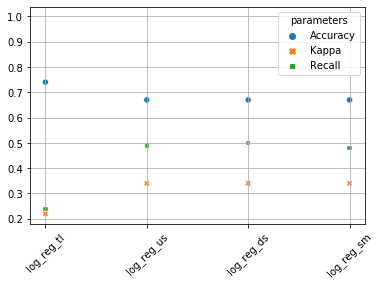

<Figure size 1440x720 with 0 Axes>

In [75]:
plt.plot([1])

ax = sns.scatterplot(data=results_df)
plt.xticks(rotation=45)
plt.grid()
plt.figure(figsize=(20, 10))
plt.show()